In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import floor

drop_attribs = [
    "Player Name",             
    "injury_status",           
    "team",                    
    "opp",                     
    "spread",                
    "over_under",              
    "implied_team_score",      
    "L5_dvp_rank",             
    "L5_ppg_floor",            
    "L5_ppg_avg",              
    "L5_ppg_max",              
    "Pos",                    
    "Salary",                  
    "Rest",                    
    "Opp Pace",                
    "Opp DEff",               
    "Opp DvP",                 
    "L2 FGA",                  
    "L5 FGA",               
    "S FGA", 
    "L2 Min",                 
    "L5 Min",                  
    "S Min",                   
    "L5 FP",                   
    "S FP",                    
    "Floor FP",                
    "Ceil FP",                 
    "Actual Min",             
    "Actual FP",               
    "Actual Val",            
    "FantasyFuelPPGProj",      
    "FantasyFuelValueProj", 
    "DFN_PPGProj",      
    "DFN_MinProj",          
    "DFN_ValueProj",          
]

In [280]:
def openBestLineupsForDate():
    file_name = 'BestLineups/2020-02-02'
    file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
    return file
def openCreatedLineupsForDate():
    file_name = 'BestCreatedLineups/2020-02-02'
    file = pd.read_csv(file_name,index_col=[0,1], skipinitialspace=True)
    return file

In [281]:
def dropLowScoringLineups(file):
    drop_level = file.groupby(['Lineup Num'])['Actual FP'].sum().mean() - file.groupby(['Lineup Num'])['Actual FP'].sum().std()
    group = file.groupby(['Lineup Num'])
    return group.filter(lambda x: x['Actual FP'].sum() > drop_level)

def plotLineupActualFP(file):
    file.groupby(['Lineup Num'])['Actual FP'].sum().plot()
    print(file.groupby(['Lineup Num'])['Actual FP'].sum().mean())
    print(file.groupby(['Lineup Num'])['Actual FP'].sum().max())
    
def plotLineupProjectedFP(file, projectionType):
    file.groupby(['Lineup Num'])[projectionType].sum().plot()

In [282]:
actual = openBestLineupsForDate()
created = openCreatedLineupsForDate()

345.44137931034487
378.40000000000003


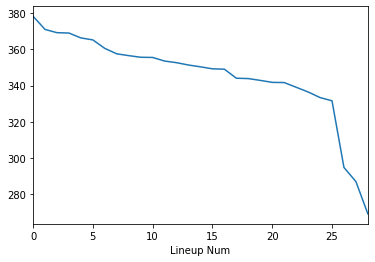

In [283]:
actual = dropLowScoringLineups(actual)
plotLineupActualFP(actual)

268.3820512820513
345.8


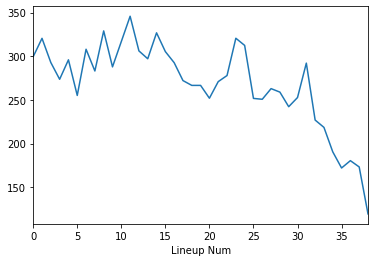

In [284]:
plotLineupActualFP(created)

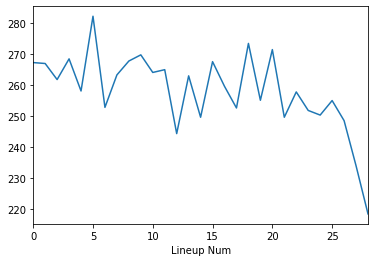

In [285]:
plotLineupProjectedFP(actual, "FantasyFuelPPGProj")

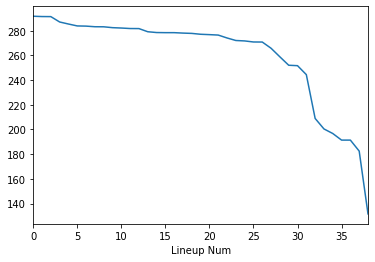

In [286]:
plotLineupProjectedFP(created, 'Avg Proj')

In [287]:
actual.loc[0]['Actual FP'].sum()

378.4

In [288]:
created.loc[0]['Actual FP'].sum()

299.5

In [289]:
a = set(actual['Player Name'].value_counts().keys().tolist())
b = set(created['Player Name'].value_counts().keys().tolist())
print(a.intersection(b))

{'James Harden', 'Zion Williamson', 'Patrick McCaw', 'Zach LaVine', 'Lonzo Ball', 'Eric Gordon', 'Devin Booker', 'Deandre Ayton', 'Pat Connaughton', 'Fred VanVleet', 'Tyler Johnson', 'Jevon Carter', 'Kyle Lowry', 'Giannis Antetokounmpo', 'Khris Middleton', "E'Twaun Moore", 'Thabo Sefolosha', 'Terence Davis', 'Coby White', 'Brook Lopez', 'Kelly Oubre Jr.', 'Danuel House Jr.', 'Josh Hart', 'Luke Kornet', 'Mikal Bridges', 'OG Anunoby', 'Shaquille Harrison', 'Ryan Arcidiacono', 'Cheick Diallo', 'Serge Ibaka', 'Denzel Valentine', 'Brandon Ingram', 'Jrue Holiday', 'Ben McLemore', 'Wesley Matthews', 'Chris Boucher', 'Ersan Ilyasova', 'Thaddeus Young', 'Chandler Hutchison'}


In [290]:
a.symmetric_difference(b)

{'Adam Mokoka',
 'Austin Rivers',
 'Cristiano Felicio',
 'Daniel Gafford',
 'Derrick Favors',
 'Donte DiVincenzo',
 'Eric Bledsoe',
 'JJ Redick',
 'Jaxson Hayes',
 'Kyle Korver',
 'Matt Thomas',
 'Oshae Brissett',
 'P.J. Tucker',
 'Pascal Siakam',
 'Robin Lopez',
 'Russell Westbrook',
 'Stanley Johnson',
 'Sterling Brown',
 'Tomas Satoransky'}

In [291]:
a.difference(b)

set()

In [292]:
actual['Player Name'].value_counts()

Terence Davis            28
James Harden             26
Giannis Antetokounmpo    26
Brook Lopez              23
Josh Hart                19
Danuel House Jr.         12
Brandon Ingram           12
Lonzo Ball               11
Ben McLemore             10
Chandler Hutchison        9
Chris Boucher             6
Zion Williamson           4
Kelly Oubre Jr.           4
Deandre Ayton             4
Serge Ibaka               3
Thaddeus Young            3
Pat Connaughton           3
Zach LaVine               2
E'Twaun Moore             2
Luke Kornet               2
Ryan Arcidiacono          2
Cheick Diallo             2
Shaquille Harrison        2
Devin Booker              2
Patrick McCaw             1
Denzel Valentine          1
Coby White                1
Khris Middleton           1
Eric Gordon               1
Fred VanVleet             1
Wesley Matthews           1
Jevon Carter              1
Kyle Lowry                1
Thabo Sefolosha           1
Ersan Ilyasova            1
Tyler Johnson       

In [293]:
created['Player Name'].value_counts()

James Harden             28
Brandon Ingram           24
Mikal Bridges            20
Serge Ibaka              19
Kelly Oubre Jr.          18
Russell Westbrook        16
Tomas Satoransky         15
Brook Lopez              13
Ben McLemore             12
Danuel House Jr.         10
Zion Williamson           9
Donte DiVincenzo          7
Pascal Siakam             6
Coby White                6
P.J. Tucker               6
Giannis Antetokounmpo     5
JJ Redick                 5
Devin Booker              4
Luke Kornet               4
Austin Rivers             4
Terence Davis             4
Josh Hart                 4
Denzel Valentine          4
Eric Bledsoe              4
Wesley Matthews           4
Chris Boucher             3
Eric Gordon               3
Pat Connaughton           3
Jevon Carter              3
Kyle Lowry                3
E'Twaun Moore             3
Chandler Hutchison        3
Jrue Holiday              2
OG Anunoby                2
Patrick McCaw             2
Lonzo Ball          